In [1]:
from wqu.sm.markov import StateMarkovChain


# Define the state
states = [-1, 1]
P = [
    [0.55, 0.45],
    [0.45, 0.55]
]

# Create the Markov chain instance with initial state -1
mc = StateMarkovChain(states=states, transition_matrix=P, initial_state=-1)

# Example 1: Simulate a two-step path
mc.reset(to_state=-1)
path_two_steps = mc.simulate(2)

# Example 2: Simulate a three-step path
mc.reset(to_state=-1)
path_three_steps = mc.simulate(3)

(path_two_steps, path_three_steps)

([-1, -1, np.int64(1)], [-1, np.int64(1), np.int64(-1), np.int64(-1)])

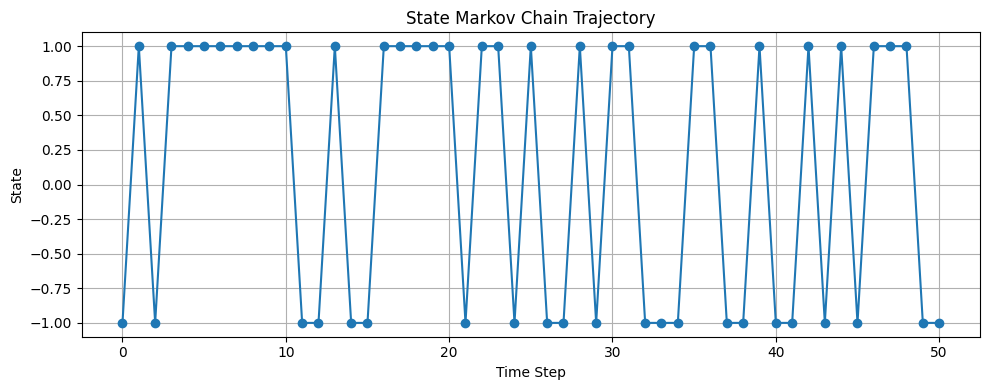

In [2]:
mc.plot_trajectory()

In [3]:
# Simulating the stochastic process defined by: $X_t = X_{t-1} + s_t$ 
 
# Initialize 
states = [-1, 1]
P = [
    [0.55, 0.45],
    [0.45, 0.55]
]

mc = StateMarkovChain(states=states, transition_matrix=P, initial_state=-1)

# Simulate the process X_t = X_{t-1} + s_t for 20 steps
Xt_path, state_path = mc.simulate_X_t_process(steps=20, x0=0)

(Xt_path, state_path)

([0,
  -1,
  np.int64(0),
  np.int64(1),
  np.int64(2),
  np.int64(3),
  np.int64(2),
  np.int64(3),
  np.int64(2),
  np.int64(3),
  np.int64(4),
  np.int64(5),
  np.int64(6),
  np.int64(5),
  np.int64(4),
  np.int64(5),
  np.int64(6),
  np.int64(5),
  np.int64(4),
  np.int64(5),
  np.int64(4)],
 [-1,
  -1,
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(-1),
  np.int64(1),
  np.int64(-1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(-1),
  np.int64(-1),
  np.int64(1),
  np.int64(1),
  np.int64(-1),
  np.int64(-1),
  np.int64(1),
  np.int64(-1)])

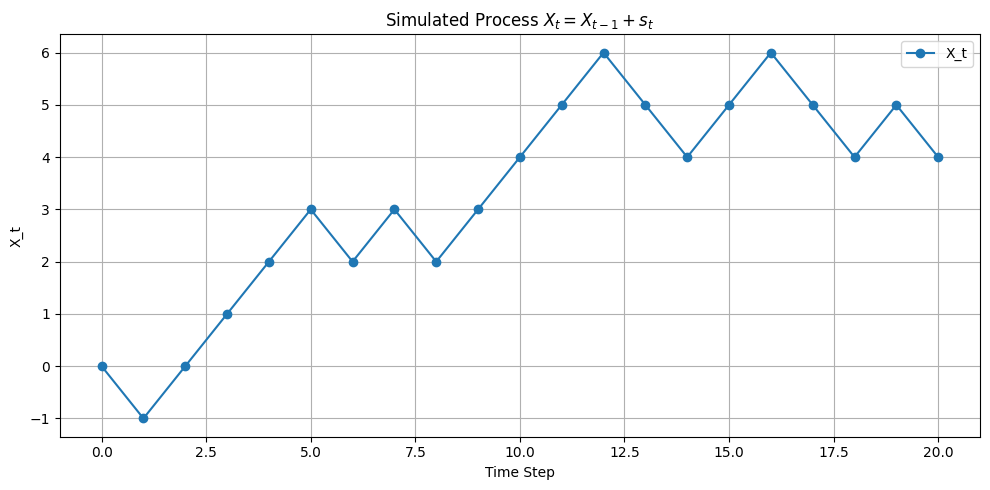

In [4]:
import matplotlib.pyplot as plt

# Plot the simulated X_t process
plt.figure(figsize=(10, 5))
plt.plot(Xt_path, marker='o', label='X_t')
plt.title("Simulated Process $X_t = X_{t-1} + s_t$")
plt.xlabel("Time Step")
plt.ylabel("X_t")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

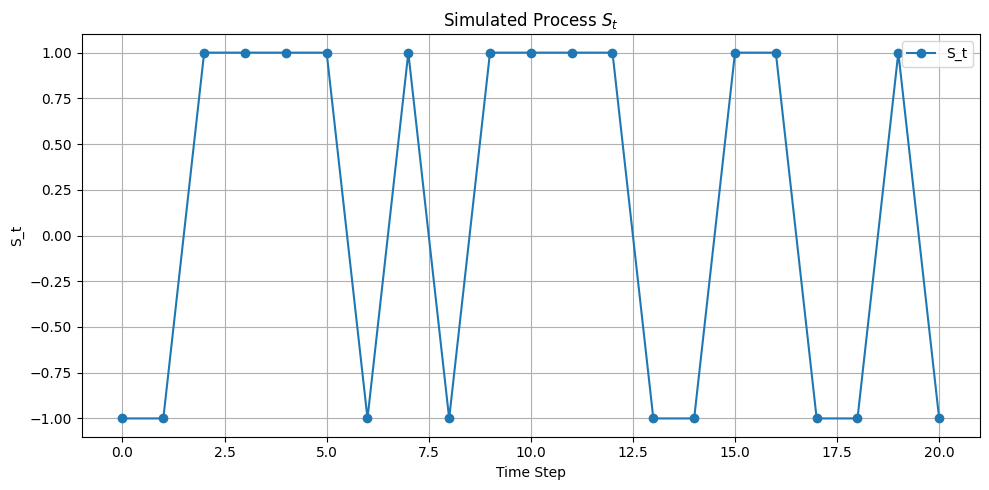

In [5]:
# Plot the simulated S_t process (states)

plt.figure(figsize=(10, 5))
plt.plot(state_path, marker='o', label='S_t')
plt.title("Simulated Process $S_t$")
plt.xlabel("Time Step")
plt.ylabel("S_t")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

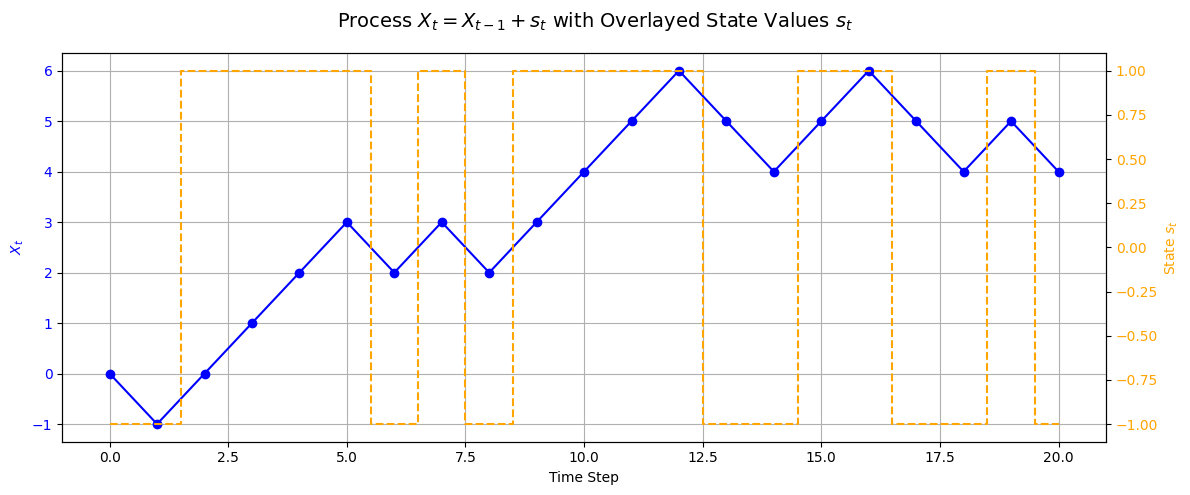

In [6]:
# Overlay both X_t and state values s_t on the same plot
time = list(range(len(Xt_path)))

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot X_t
ax1.plot(time, Xt_path, 'o-', color='blue', label='X_t')
ax1.set_xlabel("Time Step")
ax1.set_ylabel("$X_t$", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot s_t on secondary axis
ax2 = ax1.twinx()
ax2.step(time, state_path, where='mid', color='orange', linestyle='--', label='s_t (state)')
ax2.set_ylabel("State $s_t$", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Legends and titles
fig.suptitle("Process $X_t = X_{t-1} + s_t$ with Overlayed State Values $s_t$", fontsize=14)
ax1.grid(True)
fig.tight_layout()
plt.show()

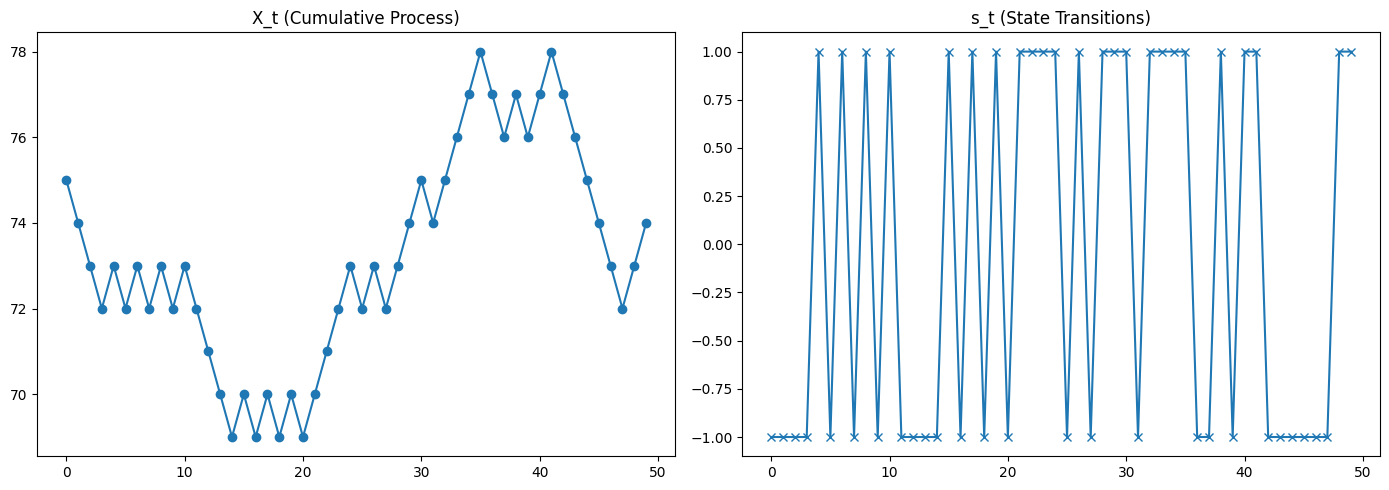

Empirical Transition Matrix (Psim):
 [[12. 14.]
 [13. 10.]]


In [8]:
states = [-1, 1]
P = [
    [0.55, 0.45],
    [0.45, 0.55]
]

mc = StateMarkovChain(states, P, initial_state=-1)
X, s_path, Psim = mc.simulate_X_t(steps=50, x0=75)

# ---- Plot results ----

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(X, marker='o')
plt.title("X_t (Cumulative Process)")

plt.subplot(1, 2, 2)
plt.plot(s_path, marker='x')
plt.title("s_t (State Transitions)")

plt.tight_layout()
plt.show()

print("Empirical Transition Matrix (Psim):\n", Psim)

In [10]:
mc.index_map

{np.int64(-1): 0, np.int64(1): 1}